In [88]:
import pandas as pd
import sklearn
import spacy
import nltk
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


# The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [28]:
dataset = pd.read_csv('sentiment-analysis-on-movie-reviews/sampleSubmission.csv')

In [29]:
dataset.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [16]:
dataset.shape

(66292, 2)

In [33]:
train=pd.read_csv('sentiment-analysis-on-movie-reviews/train.tsv.zip','\t')

In [34]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [18]:
train.shape

(66292, 3)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [12]:
test = pd.read_csv('sentiment-analysis-on-movie-reviews/test.tsv.zip','\t')

In [17]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [14]:
test.describe()

,PhraseId,SentenceId
count,66292.00000,66292.000000
mean,189206.50000,10114.909144
std,19136.99636,966.787807
min,156061.00000,8545.000000
25%,172633.75000,9266.000000
50%,189206.50000,10086.000000
75%,205779.25000,10941.000000
max,222352.00000,11855.000000


In [19]:
test.shape

(66292, 3)

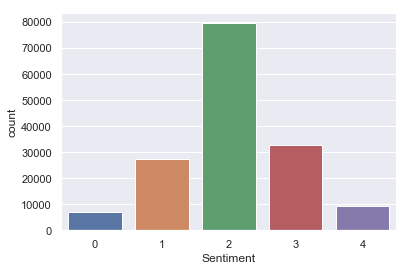

In [36]:
import seaborn as sns

sns.set()
sns.countplot(x='Sentiment',data =train)

In [37]:
train.Sentiment.unique()

array([1, 2, 3, 4, 0])

In [39]:
train.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [41]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [42]:
train.Phrase[0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [44]:
train_df = train.drop(['PhraseId','SentenceId'],axis =1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 2 columns):
Phrase       156060 non-null object
Sentiment    156060 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [45]:
train_df.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [47]:
#train_df_vect = vectorizer.fit_transform(train_df.Phrase)

In [54]:
from sklearn.model_selection import train_test_split

In [82]:
X = train.Phrase

In [83]:
y = train.Sentiment

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(109242, 15218)

In [87]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [90]:
X_test_tfidf = vectorizer.transform(X_test)

In [95]:
# Form a prediction set
predictions_svc = clf.predict(X_test_tfidf)

In [96]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_svc))

[[  621  1114   335    42     1]
 [  451  3653  3734   372    18]
 [  102  1735 19775  1883    93]
 [   16   294  4094  5003   634]
 [    3    26   323  1536   960]]


In [99]:
metrics.accuracy_score(y_test,predictions_svc)

0.6410354991669871

In [101]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           0       0.52      0.29      0.38      2113
           1       0.54      0.44      0.49      8228
           2       0.70      0.84      0.76     23588
           3       0.57      0.50      0.53     10041
           4       0.56      0.34      0.42      2848

   micro avg       0.64      0.64      0.64     46818
   macro avg       0.58      0.48      0.52     46818
weighted avg       0.63      0.64      0.63     46818



In [103]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions_svc))

0.6410354991669871


In [108]:
print(clf.predict(vectorizer.transform(['That was a horrible movie'])))

[0]


In [109]:
print(clf.predict(vectorizer.transform(['That was an awesome movie'])))

[4]


In [97]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf,y_train)

predictions_lr = lr_model.predict(X_test_tfidf)
print(metrics.confusion_matrix(y_test,predictions_lr))

[[  319  1008   730    53     3]
 [  164  2607  5114   333    10]
 [   33  1009 21293  1212    41]
 [    5   230  5243  4283   280]
 [    1    28   585  1629   605]]


In [104]:
print(metrics.classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       0.61      0.15      0.24      2113
           1       0.53      0.32      0.40      8228
           2       0.65      0.90      0.75     23588
           3       0.57      0.43      0.49     10041
           4       0.64      0.21      0.32      2848

   micro avg       0.62      0.62      0.62     46818
   macro avg       0.60      0.40      0.44     46818
weighted avg       0.61      0.62      0.58     46818



In [105]:
metrics.accuracy_score(y_test,predictions_lr)

0.6217053270109787

In [66]:
X

<156060x15240 sparse matrix of type '<class 'numpy.float64'>'
	with 972099 stored elements in Compressed Sparse Row format>

In [67]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [68]:
train_df.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [78]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [79]:
vectorization = TfidfVectorizer()
dtm = vectorization.fit_transform(train_df.Phrase)

In [80]:
dtm

<156060x15240 sparse matrix of type '<class 'numpy.float64'>'
	with 972099 stored elements in Compressed Sparse Row format>

In [81]:
train_df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64